In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
nc = 10

In [ ]:
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


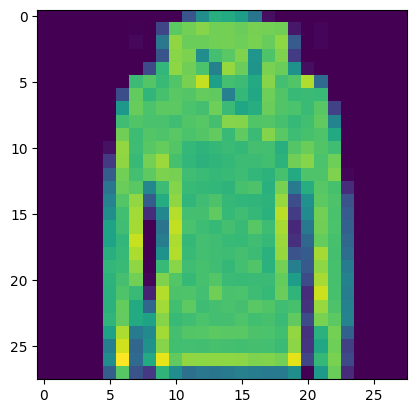

In [ ]:
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

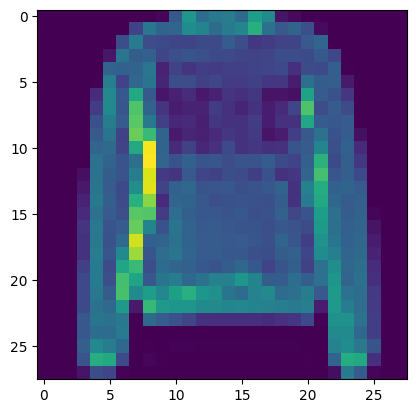

In [ ]:
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

In [ ]:
Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)
print(Xtrain.shape)
print(Xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
ytrainEnc = tf.one_hot(ytrain, depth = nc)
ytestEnc = tf.one_hot(ytest, depth = nc)

In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_size = 3, activation = "relu", input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size = 3, activation = "relu"))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(Xtrain, ytrainEnc, validation_data = (Xtest, ytestEnc), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 170s 90ms/step - loss: 0.5282 - accuracy: 0.8297 - val_loss: 0.4021 - val_accuracy: 0.8585
Epoch 2/3
1875/1875 [==============================] - 168s 90ms/step - loss: 0.3227 - accuracy: 0.8837 - val_loss: 0.3875 - val_accuracy: 0.8700
Epoch 3/3
1875/1875 [==============================] - 168s 89ms/step - loss: 0.2703 - accuracy: 0.9007 - val_loss: 0.3716 - val_accuracy: 0.8725


In [ ]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred, axis = 1)
score = accuracy_score(ypred, ytest)
print("Accuracy score is: ", 100*score, " %")

313/313 [==============================] - 10s 33ms/step
Accuracy score is:  87.25  %
